In [72]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [73]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
X=titanic.drop(['Name','PassengerId','Survived','Ticket','Cabin'],axis=1)
y=titanic.Survived

In [77]:
X=pd.get_dummies(X)

In [91]:
X=X.fillna({'Age' : X.Age.median()})
# X.groupby('Sex_male').agg('count')
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,19.0,0,0,30.0000,True,False,False,False,True
888,3,28.0,1,2,23.4500,True,False,False,False,True
889,1,26.0,0,0,30.0000,False,True,True,False,False


In [79]:
clf=tree.DecisionTreeClassifier(criterion='entropy') #Энтропия

In [80]:
clf.fit(X,y) # обучение

DecisionTreeClassifier(criterion='entropy')

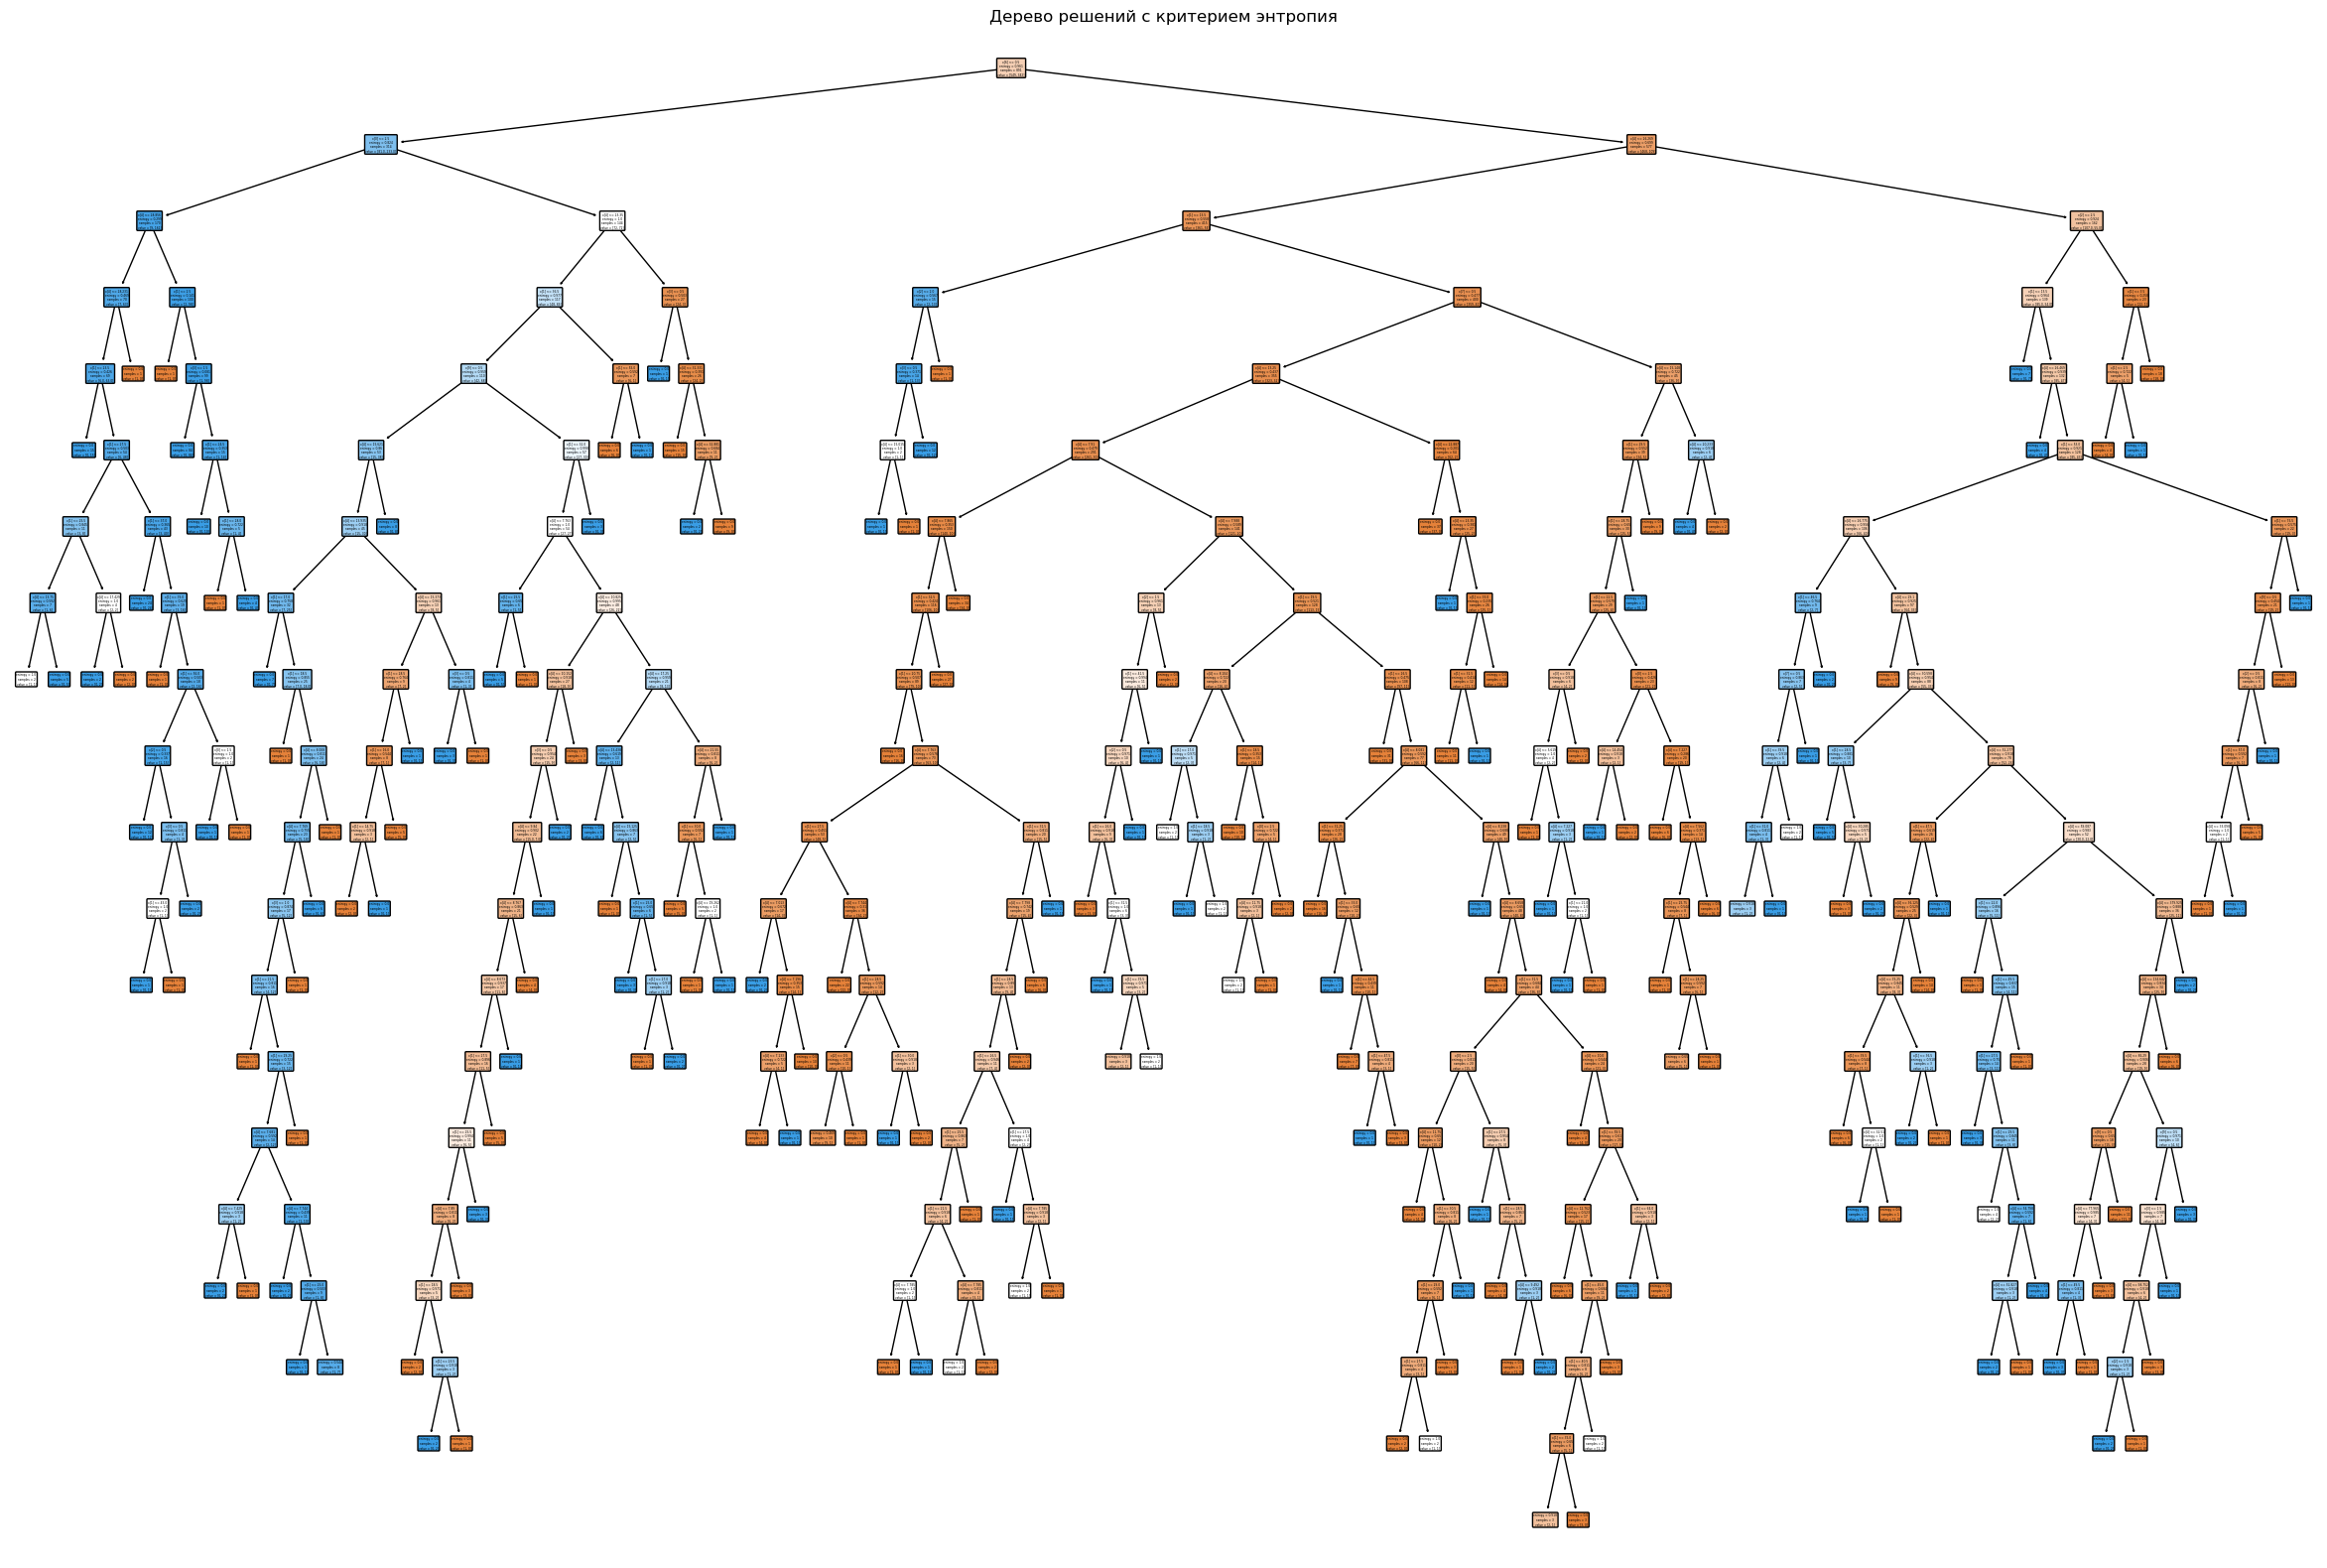

In [82]:
plt.figure(figsize=(30, 20))             #Отрисовка Дерева
tree.plot_tree(clf, filled=True, rounded=True)
plt.title('Дерево решений с критерием энтропия')
# Сохранение графика в файл перед его показом
plt.savefig('decision_tree_entropy.png', dpi=300)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.33, random_state=42 )

In [16]:
clf.score(X,y)

0.9797979797979798

In [17]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
clf.score(X_train,y_train)

1.0

In [19]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [20]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [21]:
clf.score(X_train,y_train)

0.8915254237288136

In [22]:
max_depth_values=range(1,100)

In [23]:
scores_data=pd.DataFrame()

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(clf, X_train, y_train, cv=5).mean()   #количество фолдов (разбиений) в кросс-валидации.

0.7966101694915254

In [94]:
for max_depth in max_depth_values:          #цикл по обучению на 100 глубине
    clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score=clf.score(X_train,y_train)
    test_score=clf.score(X_test,y_test)
    mean_cross_val_score=cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data=pd.DataFrame({'max_depth':[max_depth],'train_score':[train_score],'test_score':[test_score],'cross_val_score':[mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])
scores_data.head(20)

,max_depth,train_score,test_score,cross_val_score
0,1,0.796610,0.781879,0.796610
0,2,0.796610,0.781879,0.796610
0,3,0.816949,0.796980,0.769492
0,4,0.837288,0.766779,0.769492
0,5,0.871186,0.765101,0.820339
0,6,0.891525,0.744966,0.823729
0,7,0.911864,0.755034,0.810169
0,8,0.932203,0.763423,0.820339
0,9,0.949153,0.768456,0.789831
0,10,0.969492,0.743289,0.786441


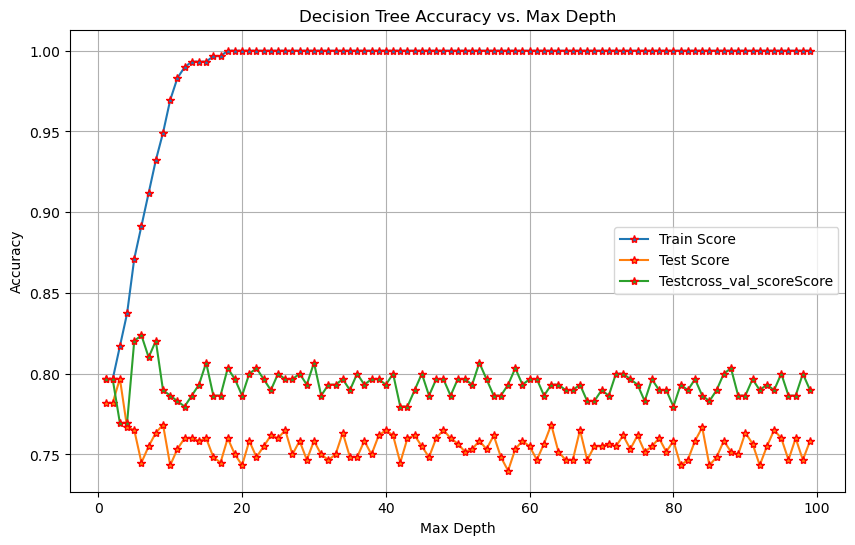

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(scores_data['max_depth'], scores_data['train_score'], label='Train Score', marker='*', linestyle='-',mec='r')
plt.plot(scores_data['max_depth'], scores_data['test_score'], label='Test Score', marker='*', linestyle='-',mec='r')
plt.plot(scores_data['max_depth'], scores_data['cross_val_score'], label='Testcross_val_scoreScore', marker='*', linestyle='-',mec='r')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3, min_samples_split=100,min_samples_leaf=10)

In [56]:
from sklearn.model_selection import GridSearchCV    #для определения ТОП параметров

In [57]:
clf=tree.DecisionTreeClassifier()

In [58]:
paametrs={'criterion' : ['gini', 'entropy'], 'max_depth': range(1,30)}

In [59]:
grid_search_cv=GridSearchCV(clf,paametrs,cv=5)

In [60]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [61]:
grid_search_cv.best_params_  #ТОп параметры

{'criterion': 'entropy', 'max_depth': 5}

In [62]:
best_clf=grid_search_cv.best_estimator_  # Присваеваем ТОп параметры 

In [95]:
best_clf.score(X_test, y_test)   #accuracy

0.8711864406779661

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss

In [65]:
y_pred=best_clf.predict(X_test)

In [69]:
print(f'accuracy: {best_clf.score(X_test, y_test):.3f}') 
print(f'precision: {precision_score(y_test, y_pred):.3f}') 
print(f'recall: {recall_score(y_test, y_pred):.3f}')
print(f'f1: {f1_score(y_test, y_pred):.3f}')

accuracy: 0.765
precision: 0.664
recall: 0.748
f1: 0.703
